# Importações

In [1]:
import os
import laspy
import numpy as np
import pandas as pd
from dotenv import load_dotenv
from shapely.geometry import box, Polygon, MultiPolygon, GeometryCollection
import geopandas

# Configuração

In [2]:
load_dotenv()

True

In [3]:
las = laspy.read(os.environ.get("TRAIN_DATA_PATH"))

In [4]:
lidar_data = np.vstack(
    (
        las.X,
        las.Y,
        las.Z,
        las.intensity,
        las.return_number,
        las.number_of_returns,
        las.classification,
    )
).transpose()

In [5]:
lidar_data[:,0] = lidar_data[:,0] / 100

array([838257, 838257, 838257, ..., 842250, 842250, 842250])

In [6]:
lidar_data[:,1] = lidar_data[:,1] / 100

array([9674657, 9674657, 9674657, ..., 9671831, 9671832, 9671832])

In [7]:
lidar_data[:,2] = lidar_data[:,2] / 100

In [8]:
lidar_dataset: pd.DataFrame = pd.DataFrame(
    lidar_data,
    columns=[
        "X",
        "Y",
        "Z",
        "intensity",
        "return_number",
        "number_of_returns",
        "classification",
    ],
)

In [9]:
del las
del lidar_data

In [10]:
geo_lidar_dataset: geopandas.GeoDataFrame = geopandas.GeoDataFrame(
    lidar_dataset,
    geometry=geopandas.points_from_xy(
        lidar_dataset.X,
        lidar_dataset.Y,
        crs="EPSG:32720",
    ),
    crs="EPSG:32720",
)

KeyboardInterrupt: 

In [ ]:
geo_lidar_dataset

,X,Y,Z,intensity,return_number,number_of_returns,classification,geometry
0,838257,9674657,76,1,2,2,1,POINT (838257.000 9674657.000)
1,838257,9674657,76,1,2,2,1,POINT (838257.000 9674657.000)
2,838257,9674657,77,1,2,2,1,POINT (838257.000 9674657.000)
3,838257,9674657,78,2,1,1,1,POINT (838257.000 9674657.000)
4,838257,9674657,78,1,1,1,1,POINT (838257.000 9674657.000)
...,...,...,...,...,...,...,...,...
64274556,841000,9674125,116,6,1,2,1,POINT (841000.000 9674125.000)
64274557,841000,9674129,107,1,2,2,1,POINT (841000.000 9674129.000)
64274558,841000,9674129,107,1,2,2,1,POINT (841000.000 9674129.000)
64274559,841000,9674128,104,1,2,2,1,POINT (841000.000 9674128.000)


In [ ]:
inventory_plot_location: geopandas.GeoDataFrame = geopandas.read_file(
    os.environ.get("INVENTORY_PLOT_LOCATION_FILE_PATH"),
)

In [ ]:
inventory_plot_location

,plot_ID,geometry
0,P20,"POLYGON ((840040.725 9674392.229, 840082.852 9..."
1,P02,"POLYGON ((840077.054 9674170.361, 840124.283 9..."
2,P07,"POLYGON ((840331.289 9673499.875, 840372.258 9..."
3,P09,"POLYGON ((840301.102 9673285.583, 840340.905 9..."
4,P08,"POLYGON ((839205.643 9673316.074, 839256.495 9..."
5,P11,"POLYGON ((839297.741 9673134.604, 839339.666 9..."
6,P10,"POLYGON ((841354.435 9673642.624, 841401.045 9..."
7,P12,"POLYGON ((841393.219 9673456.688, 841436.904 9..."
8,P04,"POLYGON ((841168.997 9674649.126, 841205.644 9..."
9,P05,"POLYGON ((841201.669 9674452.071, 841249.937 9..."


<Axes: >

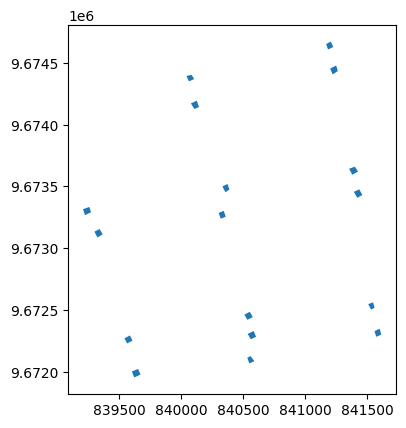

In [ ]:
inventory_plot_location.plot()

In [ ]:
inventory = pd.read_parquet(os.environ.get("ANALYTICAL_INVENTORY_PATH"))

In [ ]:
inventory

,area,plot,tree,common.name,scientific.name,family.name,DBH,type,Dead,D.class,...,UTM.Easting,UTM.Northing,family.scientific.wood.density,family.wood.density,wood.density,tree.height,lorey.height,snag.density,IACD,ACD
0,DUC_A01,2,001a,macucu,Licania guianensis,Chrysobalanaceae,49.6,O,False,NaN,...,840127.0705,9674180.998,NaN,0.780701,0.780701,30.021596,22.006406,0.51568,1491.440811,0.596576
1,DUC_A01,2,001b,uxirana,Sacoglottis guianensis,Humiriaceae,43.6,O,False,NaN,...,840098.9678,9674177.868,0.835775,0.771500,0.835775,28.598966,22.006406,0.51568,1182.006775,0.472803
2,DUC_A01,2,002a,mapatirana,Pourouma minor,Urticaceae,31.5,O,False,NaN,...,840126.4377,9674180.705,0.435953,0.344090,0.435953,24.880846,22.006406,0.51568,289.831034,0.289831
3,DUC_A01,2,002b,abiurana,Pouteria gongrijpii,Sapotaceae,39.2,O,False,NaN,...,840109.4829,9674171.803,0.799403,0.702085,0.799403,27.395561,22.006406,0.51568,881.768755,0.352708
4,DUC_A01,2,003a,roxinho,Peltogyne lecointei,Fabaceae,10.0,O,False,NaN,...,840125.6847,9674181.313,0.763333,0.678134,0.763333,13.060493,22.006406,0.51568,28.424360,0.028424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164,DUC_A01,20,048a,quarubarana,Erisma uncinatum,Vochysiaceae,24.0,O,False,NaN,...,840072.5767,9674390.969,0.523047,0.551651,0.523047,21.773927,20.439020,0.51568,178.763671,0.178764
1165,DUC_A01,20,049a,fava saboeiro,Abarema jupunba,Fabaceae,14.0,O,False,NaN,...,840071.0245,9674395.507,0.585129,0.678134,0.585129,16.096338,20.439020,0.51568,51.859687,0.051860
1166,DUC_A01,20,050a,mamorana,Eriotheca globosa,Malvaceae,22.0,O,False,NaN,...,840069.0191,9674396.896,0.410000,0.476090,0.410000,20.803413,20.439020,0.51568,113.755013,0.113755
1167,DUC_A01,20,051a,louro cheiroso,Diospyros artanthifolia,Ebenaceae,11.9,O,False,NaN,...,840069.1150,9674398.094,NaN,0.697848,0.697848,14.575270,20.439020,0.51568,40.705525,0.040706


In [ ]:
geo_inventory_dataset: geopandas.GeoDataFrame = geopandas.GeoDataFrame(
    inventory,
    geometry=geopandas.points_from_xy(
        inventory["UTM.Easting"], inventory["UTM.Northing"]
    ),
    crs="EPSG:32720",
)

# Merge inventário com os dados do LiDAR

In [ ]:
inventory_point_in_poly: geopandas.GeoDataFrame = geopandas.sjoin(
    geo_inventory_dataset,
    inventory_plot_location,
    predicate="within",
    lsuffix="left",
    rsuffix="right",
)

In [ ]:
inventory_point_in_poly

,area,plot,tree,common.name,scientific.name,family.name,DBH,type,Dead,D.class,...,family.wood.density,wood.density,tree.height,lorey.height,snag.density,IACD,ACD,geometry,index_right,plot_ID
0,DUC_A01,2,001a,macucu,Licania guianensis,Chrysobalanaceae,49.6,O,False,NaN,...,0.780701,0.780701,30.021596,22.006406,0.51568,1491.440811,0.596576,POINT (840127.071 9674180.998),1,P02
1,DUC_A01,2,001b,uxirana,Sacoglottis guianensis,Humiriaceae,43.6,O,False,NaN,...,0.771500,0.835775,28.598966,22.006406,0.51568,1182.006775,0.472803,POINT (840098.968 9674177.868),1,P02
2,DUC_A01,2,002a,mapatirana,Pourouma minor,Urticaceae,31.5,O,False,NaN,...,0.344090,0.435953,24.880846,22.006406,0.51568,289.831034,0.289831,POINT (840126.438 9674180.705),1,P02
3,DUC_A01,2,002b,abiurana,Pouteria gongrijpii,Sapotaceae,39.2,O,False,NaN,...,0.702085,0.799403,27.395561,22.006406,0.51568,881.768755,0.352708,POINT (840109.483 9674171.803),1,P02
4,DUC_A01,2,003a,roxinho,Peltogyne lecointei,Fabaceae,10.0,O,False,NaN,...,0.678134,0.763333,13.060493,22.006406,0.51568,28.424360,0.028424,POINT (840125.685 9674181.313),1,P02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164,DUC_A01,20,048a,quarubarana,Erisma uncinatum,Vochysiaceae,24.0,O,False,NaN,...,0.551651,0.523047,21.773927,20.439020,0.51568,178.763671,0.178764,POINT (840072.577 9674390.969),0,P20
1165,DUC_A01,20,049a,fava saboeiro,Abarema jupunba,Fabaceae,14.0,O,False,NaN,...,0.678134,0.585129,16.096338,20.439020,0.51568,51.859687,0.051860,POINT (840071.025 9674395.507),0,P20
1166,DUC_A01,20,050a,mamorana,Eriotheca globosa,Malvaceae,22.0,O,False,NaN,...,0.476090,0.410000,20.803413,20.439020,0.51568,113.755013,0.113755,POINT (840069.019 9674396.896),0,P20
1167,DUC_A01,20,051a,louro cheiroso,Diospyros artanthifolia,Ebenaceae,11.9,O,False,NaN,...,0.697848,0.697848,14.575270,20.439020,0.51568,40.705525,0.040706,POINT (840069.115 9674398.094),0,P20


In [ ]:
del geo_inventory_dataset

In [ ]:
lidar_point_in_plot_location: geopandas.GeoDataFrame = geopandas.sjoin(
    geo_lidar_dataset,
    inventory_point_in_poly,
    predicate="within",
    lsuffix="geo_lidar_dataset",
    rsuffix="inventory_point_in_poly",
)

In [ ]:
lidar_point_in_plot_location

,X,Y,Z,intensity,return_number,number_of_returns,classification,geometry,index_inventory_point_in_poly,area,...,family.scientific.wood.density,family.wood.density,wood.density,tree.height,lorey.height,snag.density,IACD,ACD,index_right,plot_ID


In [ ]:
lidar_point_in_plot_location = lidar_point_in_plot_location.drop_duplicates(
    subset=["X", "Y", "Z", "return_number"]
)

lidar_point_in_plot_location = lidar_point_in_plot_location.rename(
    {"geometry_inventory_plot_location": "geometry"}, axis=1
)

lidar_point_in_plot_location